In [1]:
import numpy as np
import tensorflow as tf

In [2]:
q_network = tf.keras.models.load_model("./models/pendulum_q_network.h5")
p_network = tf.keras.models.load_model("./models/pendulum_p_network.h5")

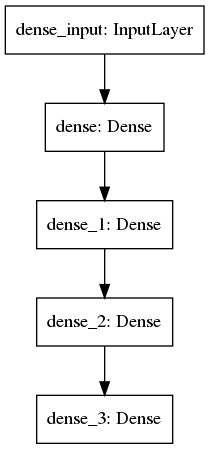

In [3]:
tf.keras.utils.plot_model(q_network, to_file='q_network.png')

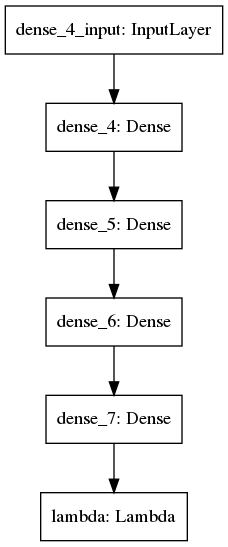

In [4]:
tf.keras.utils.plot_model(p_network, to_file='p_network.png')

In [5]:
import matplotlib.pyplot as plt

In [6]:
theta = np.linspace(-np.pi, np.pi, 1000)
dtheta = np.linspace(-8, 8, 1000)

xs, ys = np.meshgrid(theta, dtheta)

In [7]:
cos = np.cos(xs)
sin = np.sin(xs)

In [8]:
states = np.stack([cos, sin, ys])
states = states.transpose((1,2,0)).reshape((-1, 3))
states

array([[-1.00000000e+00, -1.22464680e-16, -8.00000000e+00],
       [-9.99980221e-01, -6.28943332e-03, -8.00000000e+00],
       [-9.99920886e-01, -1.25786178e-02, -8.00000000e+00],
       ...,
       [-9.99920886e-01,  1.25786178e-02,  8.00000000e+00],
       [-9.99980221e-01,  6.28943332e-03,  8.00000000e+00],
       [-1.00000000e+00,  1.22464680e-16,  8.00000000e+00]])

In [9]:
actions = p_network.predict(states)
values = q_network.predict(np.concatenate([states, actions], axis=1))

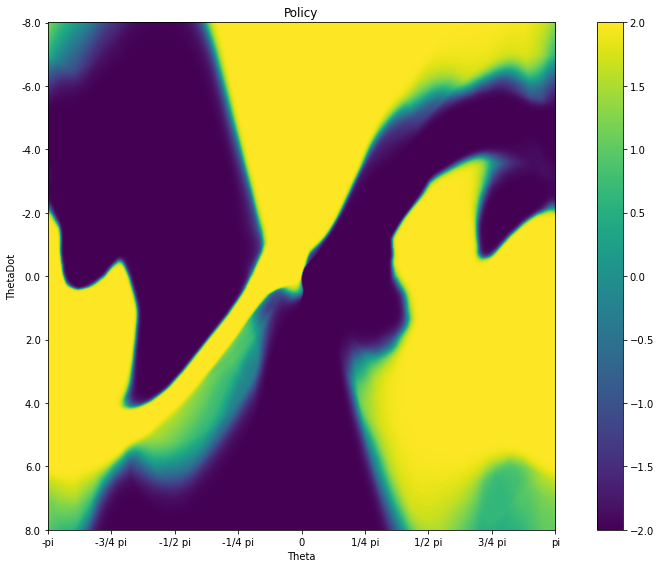

In [14]:
plt.figure(figsize=(12, 8))
plt.imshow(actions.reshape((1000, 1000)))
plt.colorbar()
plt.xticks(np.linspace(0, 1000, 9), ["-pi", "-3/4 pi", "-1/2 pi", "-1/4 pi", "0", "1/4 pi", "1/2 pi", "3/4 pi", "pi"])
plt.yticks(np.linspace(0, 1000, 9), np.linspace(-8, 8, 9))
plt.xlabel("Theta")
plt.ylabel("ThetaDot")
plt.title("Policy")
plt.tight_layout()
plt.savefig("policy.png", dpi=300)

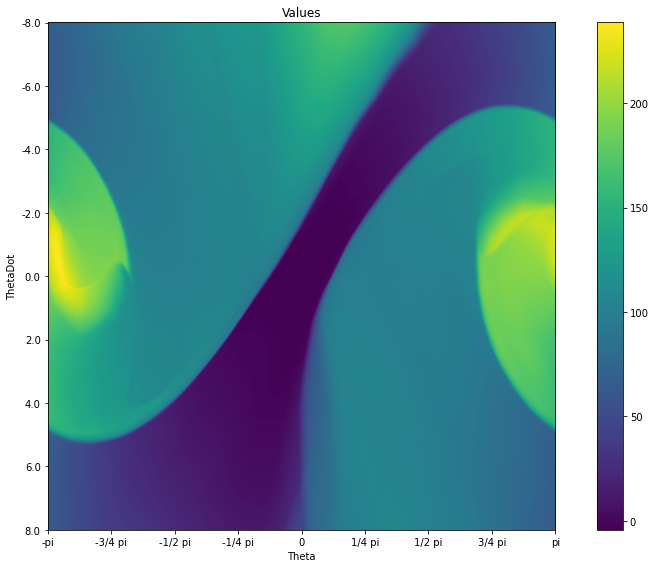

In [15]:
plt.figure(figsize=(12, 8))
plt.imshow(values.reshape((1000, 1000)))
plt.colorbar()
plt.xlabel("Theta")
plt.ylabel("ThetaDot")
plt.xticks(np.linspace(0, 1000, 9), ["-pi", "-3/4 pi", "-1/2 pi", "-1/4 pi", "0", "1/4 pi", "1/2 pi", "3/4 pi", "pi"])
plt.yticks(np.linspace(0, 1000, 9), np.linspace(-8, 8, 9))
plt.title("Values")
plt.tight_layout()
plt.savefig("values.png", dpi=300)